
CO2 Training Data and Predictions:
    Year       Actual     Predicted
0   1970  11358987.00  5.473758e+06
1   1971  12646214.00  1.010321e+07
2   1972  13435356.00  1.101133e+07
3   1973  12506009.00  1.249085e+07
4   1974  12793869.00  1.447611e+07
5   1975  14545277.43  1.592353e+07
6   1976  15991448.48  1.896993e+07
7   1977  17984787.08  1.850268e+07
8   1978  19530628.58  1.871176e+07
9   1979  17527194.18  2.025193e+07
10  1980  17408249.26  2.217188e+07
11  1981  17088018.96  1.754911e+07
12  1982  24008735.12  2.894851e+07
13  1983  26009896.34  2.627161e+07
14  1984  28714948.08  2.874328e+07
15  1985  29021891.91  2.944285e+07
16  1986  31441856.40  3.093157e+07
17  1987  29793442.34  3.078360e+07
18  1988  30298876.60  3.196173e+07
19  1989  33332986.48  3.349406e+07
20  1990  33957882.72  3.463650e+07
21  1991  34504173.06  3.543712e+07
22  1992  35875015.15  3.731877e+07
23  1993  35712670.05  3.440311e+07
24  1994  35534396.69  3.826666e+07
25  1995  40031654.89  3.767

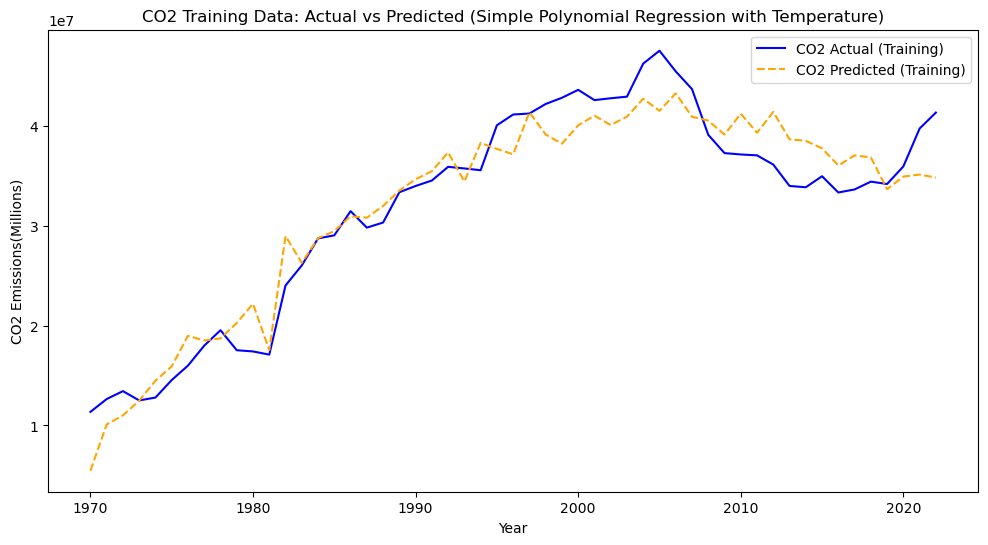

Mean Squared Error: 8829651500516.582

CH4 Training Data and Predictions:
    Year   Actual     Predicted
0   2011   861857  8.429593e+05
1   2012   940569  9.441114e+05
2   2013  1073465  1.080772e+06
3   2014  1009143  1.091989e+06
4   2015   953745  9.283036e+05
5   2016   969371  9.074338e+05
6   2017  1030608  9.829493e+05
7   2018   546574  5.522126e+05
8   2019   576504  6.169876e+05
9   2020   518053  5.828408e+05
10  2021   561698  5.371103e+05
11  2022   522819  4.796681e+05
12  2023   506745  5.238129e+05


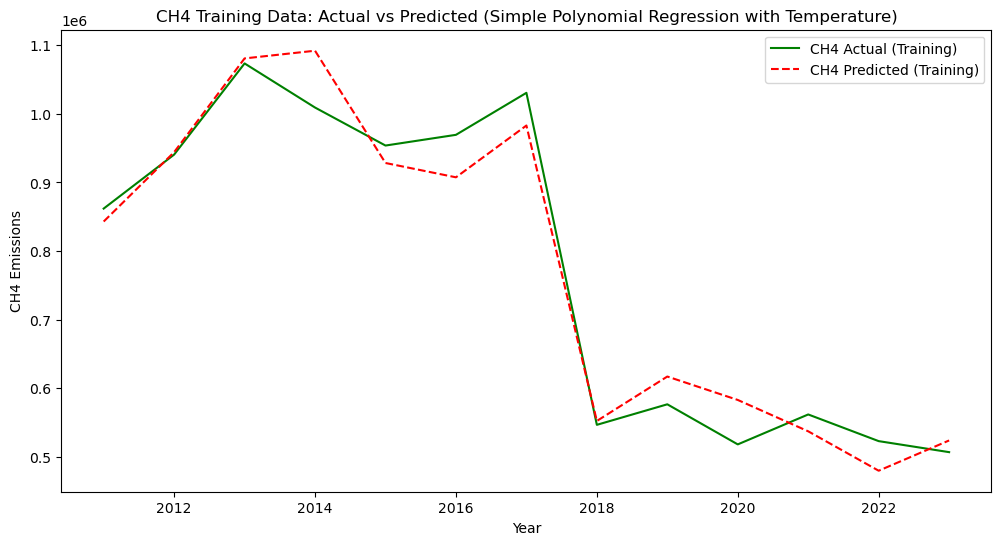

Mean Squared Error: 1743649624.664536

NO2 Training Data and Predictions:
    Year  Actual     Predicted
0   2011   18410  18547.766204
1   2012   19651  19644.088053
2   2013   18876  18809.373841
3   2014   18445  17784.694214
4   2015   19151  19298.595000
5   2016   16216  16853.903795
6   2017   16371  16623.649032
7   2018   16453  16392.069323
8   2019   16818  16423.247645
9   2020   17368  17303.912410
10  2021   17234  17142.479755
11  2022   17300  17428.835618
12  2023   17091  17131.385108


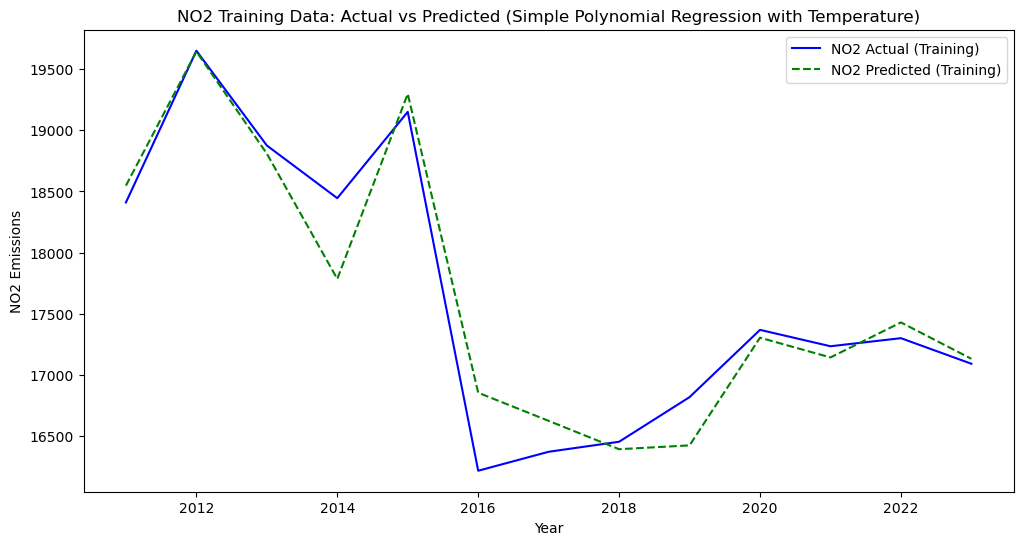

Mean Squared Error: 87866.29715562465


In [33]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import numpy as np
#datasets for CO2 and CH4 emissions
co2_data = pd.read_csv('/Users/varun/Downloads/alaska greenhouse gas emissions - Cleaned Up CO2 Emissions Alaska.csv')
ch4_data = pd.read_csv('/Users/varun/Downloads/alaska greenhouse gas emissions - Methane.csv')
no2_data = pd.read_csv('/Users/varun/Downloads/alaska greenhouse gas emissions - Nitrous Oxide.csv')

#temp data co2 ch4
temp_data = pd.read_csv('/Users/varun/Downloads/alaska greenhouse gas emissions - Temp (1).csv')


# Strip column names of any extra spaces
temp_data = temp_data.dropna()

co2_data = co2_data.dropna()
ch4_data = ch4_data.dropna()
no2_data = no2_data.dropna()

# Merge the temperature data with the emissions data for CO2 and CH4
co2_data_merged = pd.merge(co2_data, temp_data, on='Year', how='inner')
ch4_data_merged = pd.merge(ch4_data, temp_data, on='Year', how='inner')
no2_data_merged = pd.merge(no2_data, temp_data, on='Year', how='inner')

degree = 2

def simple_linear_regression_training(train_data, gas_name):
    # Now we include 'Year' and 'Temperature' as features
    feature1 = "AvgHigh(°F)"
    feature2 = "AvgLow(°F)"
    

    X_train = train_data[['Year',feature1,feature2]]  # Adding Temperature as a feature
    y_train = train_data[gas_name]  # The target variable remains the same (CO2 or CH4)
    # Initialize the Linear Regression model
    model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('linear_regression', LinearRegression())
])
    model.fit(X_train, y_train)
    # Use the trained model to predict emissions values for the given 'Year' and 'Temperature' data
    y_train_pred = model.predict(X_train)
    # Create a DataFrame to store both the actual and predicted values for comparison
    training_results_df = pd.DataFrame({
        'Year': X_train['Year'],  # 'Year' as the x-axis
        'Actual': y_train,        # Actual emissions values
        'Predicted': y_train_pred # Predicted emissions values from the linear model
    })
    return training_results_df
# Train for CO2 emissions data (including Temperature feature)
co2_training_results_df = simple_linear_regression_training(co2_data_merged, 'MetricTons(CO2)')
print("\nCO2 Training Data and Predictions:")
print(co2_training_results_df)  # Print out the actual and predicted results for CO2
# Plot the CO2 data (Actual vs Predicted)
plt.figure(figsize=(12, 6))
plt.plot(co2_training_results_df['Year'], co2_training_results_df['Actual'], label='CO2 Actual (Training)', color='blue')
plt.plot(co2_training_results_df['Year'], co2_training_results_df['Predicted'], label='CO2 Predicted (Training)', linestyle='--', color='orange')
plt.xlabel("Year")
plt.ylabel("CO2 Emissions(Millions)")
plt.title("CO2 Training Data: Actual vs Predicted (Simple Polynomial Regression with Temperature)")
plt.legend()
plt.show()


mse = mean_squared_error(co2_training_results_df['Actual'],co2_training_results_df['Predicted'])
print(f'Mean Squared Error: {mse}')



# Train and evaluate the model for CH4 emissions data (including Temperature feature)
ch4_training_results_df = simple_linear_regression_training(ch4_data_merged, 'MetricTons(Ch4)(Co2equivalent)')
print("\nCH4 Training Data and Predictions:")
print(ch4_training_results_df)  # Print out the actual and predicted results for CH4
# Plot the CH4 data (Actual vs Predicted)
plt.figure(figsize=(12, 6))
plt.plot(ch4_training_results_df['Year'], ch4_training_results_df['Actual'], label='CH4 Actual (Training)', color='green')
plt.plot(ch4_training_results_df['Year'], ch4_training_results_df['Predicted'], label='CH4 Predicted (Training)', linestyle='--', color='red')
plt.xlabel("Year")
plt.ylabel("CH4 Emissions")
plt.title("CH4 Training Data: Actual vs Predicted (Simple Polynomial Regression with Temperature)")
plt.legend()
plt.show()

mse = mean_squared_error(ch4_training_results_df['Actual'],ch4_training_results_df['Predicted'])
print(f'Mean Squared Error: {mse}')

no2_training_results_df = simple_linear_regression_training(no2_data_merged, 'MetricTons(No2)(Co2equivalent)')
print("\nNO2 Training Data and Predictions:")
print(no2_training_results_df) 

plt.figure(figsize=(12, 6))
plt.plot(no2_training_results_df['Year'], no2_training_results_df['Actual'], label='NO2 Actual (Training)', color='blue')
plt.plot(no2_training_results_df['Year'], no2_training_results_df['Predicted'], label='NO2 Predicted (Training)', linestyle='--', color='green')
plt.xlabel("Year")
plt.ylabel("NO2 Emissions")
plt.title("NO2 Training Data: Actual vs Predicted (Simple Polynomial Regression with Temperature)")
plt.legend()
plt.show()

mse = mean_squared_error(no2_training_results_df['Actual'],no2_training_results_df['Predicted'])
print(f'Mean Squared Error: {mse}')
 